# Stable diffusion XL (sd xl)

Using model stabilityai/stable-diffusion-xl-base-1.0 with diffuser StableDiffusionXLPipeline

## Install requirements

In [ ]:
!python.exe -m pip install --upgrade pip

In [ ]:
%pip install -r ../requirements-torch-windows.txt --upgrade
%pip install -r ../requirements.txt --upgrade

## Init stable diffusion

- https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0
- https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/stable_diffusion_xl

In [1]:
from diffusers import StableDiffusionXLPipeline
import torch

def init_base_diffusion_pipeline(model_id):
    pipe = StableDiffusionXLPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
    pipe.to("cuda")
    # pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True) # Not supported on windows yet
    return pipe

xlpipeline = init_base_diffusion_pipeline("stabilityai/stable-diffusion-xl-base-1.0")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

See API doc for all available options
https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/stable_diffusion_xl#diffusers.StableDiffusionXLPipeline

In [2]:
def generate(prompt1, prompt2=None, height=1024, width=1024, negative_prompt1=None, negative_prompt2=None, seed=42, num_inference_steps=30):
    generator = torch.Generator("cuda").manual_seed(seed)
    image = xlpipeline(prompt1, prompt2, height=height,width=width,negative_prompt=negative_prompt1,negative_prompt_2=negative_prompt2, generator=generator, num_inference_steps=num_inference_steps ).images[0]
    fname = f"../images/{prompt1.replace(' ','-')}.png"
    image.save(fname)
    display(image)
    return image

# Run

  0%|          | 0/30 [00:00<?, ?it/s]

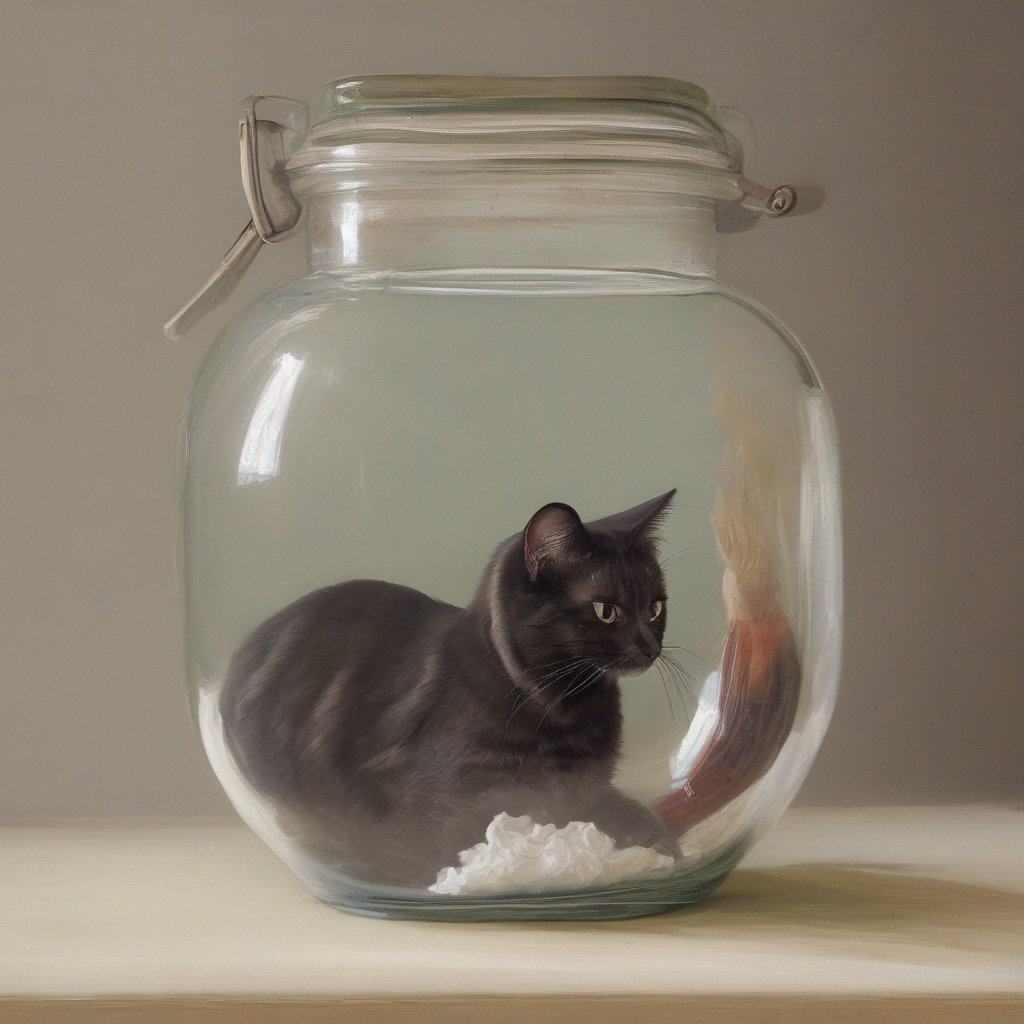

  0%|          | 0/30 [00:00<?, ?it/s]

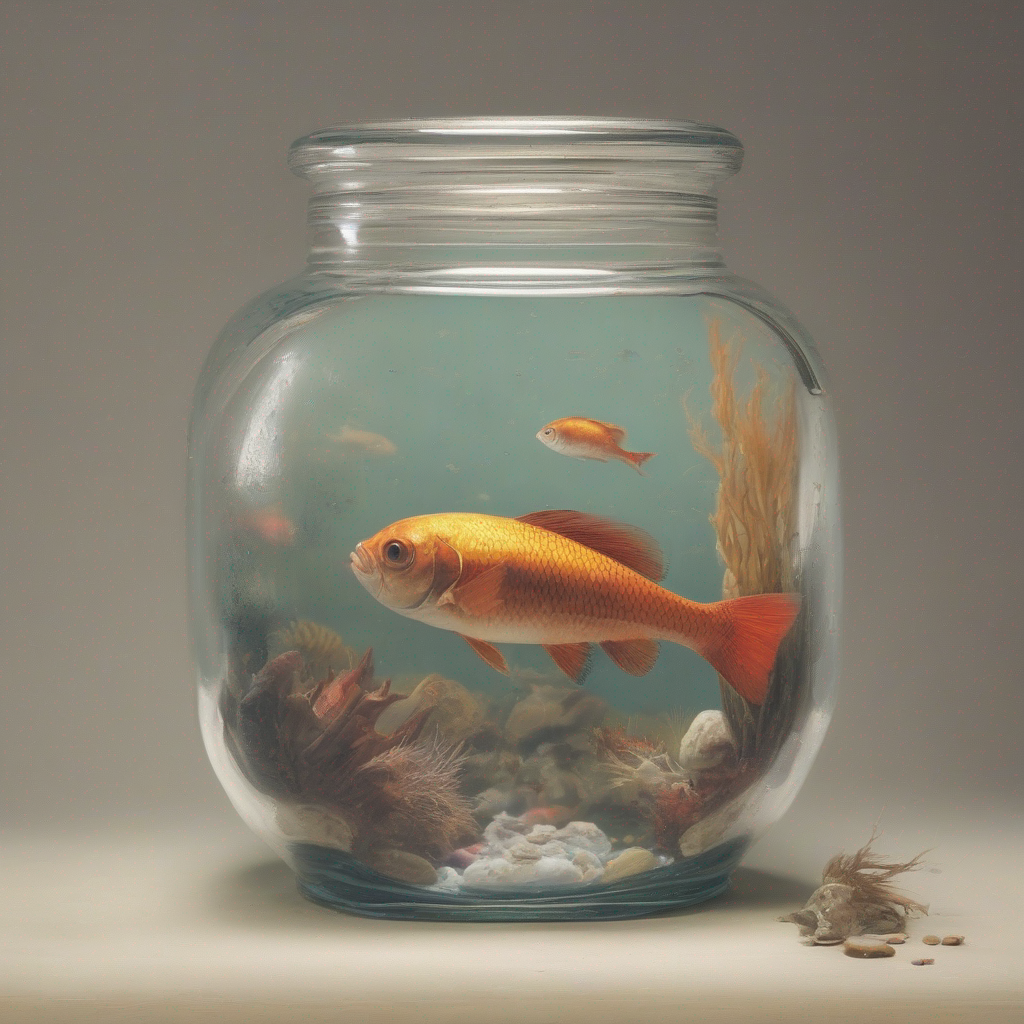

In [3]:
# img = generate("a photo of an astronaut riding a horse on mars")
img = generate("un chat dans un bocal")
img = generate("un poisson dans un bocal")

# Using utils

In [ ]:
from sdutils.utils_stablediffusion import sdxlPipeline
sdxlpipe = sdxlPipeline()
image = sdxlpipe.generate("un chat dans un bocal")
display(image)